# Planning 

## Reference
[Link](https://www.kaggle.com/bhadaneeraj/cardio-vascular-disease-detection) to Kaggle Project.

## The Problem Statement:
To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.

## Features:

Age | Objective Feature | age | int (days)  
Height | Objective Feature | height | int (cm) |  
Weight | Objective Feature | weight | float (kg) |  
Gender | Objective Feature | gender | categorical code |   
Systolic blood pressure | Examination Feature | ap_hi | int |    
Diastolic blood pressure | Examination Feature | ap_lo | int |  
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |  
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |  
Smoking | Subjective Feature | smoke | binary |  
Alcohol intake | Subjective Feature | alco | binary |  
Physical activity | Subjective Feature | active | binary |  
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |  

# Import libraries

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import seaborn as sns

import matplotlib as plt
import matplotlib.pyplot as plt

# Loading dataset

In [2]:
data_raw = pd.read_csv('dataset/cardio_train.csv', delimiter=';')

# Helper function

In [54]:
from IPython.core.display  import HTML

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# Descriptive analysis

## Dimensions

In [3]:
data_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
data_raw.shape

(69301, 13)

## Renaming columns

In [5]:
data_raw.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
data_raw.columns = ['id', 'age', 'gender', 'height', 'weight', 'sys_press', 'dia_press',
                    'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

In [7]:
data_raw.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'sys_press', 'dia_press',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## Feature engineering

### Changing `age` from days to years

In [8]:
data_raw['age_year'] = data_raw['age'].apply(lambda x: x/365)

In [9]:
data_raw.sample(3)

,id,age,gender,height,weight,sys_press,dia_press,cholesterol,gluc,smoke,alco,active,cardio,age_year
58393,84360,18455,1,148,65.0,120,80,1,1,0,0,1,0,50.561644
43413,63026,19773,1,161,59.0,120,80,1,1,0,0,1,0,54.172603
36273,52828,19711,1,174,68.0,130,90,1,1,0,0,0,1,54.002740


In [10]:
data_raw.drop('age', axis=1,inplace=True)

In [11]:
data_raw.sample(3)

,id,gender,height,weight,sys_press,dia_press,cholesterol,gluc,smoke,alco,active,cardio,age_year
33025,48167,1,157,58.0,110,70,1,1,0,1,1,0,54.265753
29144,42672,2,169,81.0,140,100,1,1,0,0,0,1,47.786301
26912,39475,2,187,88.0,120,80,1,1,0,0,0,0,54.263014


In [12]:
data_raw.rename(columns={'age_year': 'age'}, inplace=True)

In [13]:
data_raw.sample(3)

,id,gender,height,weight,sys_press,dia_press,cholesterol,gluc,smoke,alco,active,cardio,age
37022,53863,1,148,53.0,100,80,1,2,0,0,1,0,54.265753
67091,96807,2,170,70.0,130,90,1,1,0,0,0,0,53.893151
55203,79746,1,159,83.0,110,70,1,1,0,0,1,0,57.271233


In [14]:
# round `age` values to 1 decimal
data_raw['age'] = data_raw['age'].apply( lambda x: np.round(x, 1) )

In [15]:
data_raw.sample(3)

,id,gender,height,weight,sys_press,dia_press,cholesterol,gluc,smoke,alco,active,cardio,age
13037,19606,2,170,75.0,200,140,2,2,0,0,1,1,39.5
16522,24611,1,167,68.0,120,80,1,1,0,0,1,1,48.0
48940,70880,2,185,92.0,130,80,1,1,1,0,1,0,62.0


## Checking NA 

In [16]:
data_raw.isna().sum()

id             0
gender         0
height         0
weight         0
sys_press      0
dia_press      0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age            0
dtype: int64

## Descriptive statistics

### Numerical attributes

In [17]:
data_raw.dtypes 

id               int64
gender           int64
height           int64
weight         float64
sys_press        int64
dia_press        int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
age            float64
dtype: object

In [18]:
ct1 = pd.DataFrame( data_raw.apply ( np.mean) ).T 
ct2 = pd.DataFrame( data_raw.apply ( np.median ) ).T

d1 = pd.DataFrame( data_raw.apply( np.std )).T
d2 = pd.DataFrame( data_raw.apply( min )).T
d3 = pd.DataFrame( data_raw.apply( max )).T
d4 = pd.DataFrame( data_raw.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame( data_raw.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame( data_raw.apply( lambda x: x.kurtosis() )).T

m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()

# rename columns
m.columns = ["attributes","min","max","range","mean","median","std","skew","kurtosis"]
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,988.0,99999.0,99011.0,50471.480397,50494.0,28562.894266,-0.001317,-1.198215
1,gender,1.0,2.0,1.0,1.349519,1.0,0.476818,0.631203,-1.601629
2,height,55.0,250.0,195.0,164.362217,165.0,8.205278,-0.634040,7.860684
3,weight,10.0,200.0,190.0,74.203027,72.0,14.383365,1.005120,2.514805
4,sys_press,-150.0,16020.0,16170.0,128.829584,120.0,154.774688,84.886144,7506.346872
5,dia_press,-70.0,11000.0,11070.0,96.650092,80.0,189.094876,32.101546,1421.287364
6,cholesterol,1.0,3.0,2.0,1.366806,1.0,0.680265,1.587480,0.994715
7,gluc,1.0,3.0,2.0,1.226447,1.0,0.572242,2.397520,4.294805
8,smoke,0.0,1.0,1.0,0.088051,0.0,0.283369,2.907579,6.454200
9,alco,0.0,1.0,1.0,0.053881,0.0,0.225783,3.951845,13.617472


Duas variáveis binárias: somar agregado ou tabela de frequência

In [19]:
pd.crosstab( data_raw['smoke'], data_raw['cardio'] ).apply( lambda x: x / x.sum(), axis=1 )

cardio,0,1
smoke,,
0,0.498046,0.501954
1,0.524910,0.475090


De acordo com esses dados, a variável `smoke` parece não ser relevante para classificar indivíduos como saudáveis ou com doença cardiovascular. Investigaremos agora as outras variáveis binárias: `alco`, `gender` e `active`

In [20]:
pd.crosstab( data_raw['alco'], data_raw['cardio'] ).apply( lambda x: x / x.sum(), axis=1 )

cardio,0,1
alco,,
0,0.499550,0.500450
1,0.515533,0.484467


In [21]:
pd.crosstab( data_raw['gender'], data_raw['cardio'] ).apply( lambda x: x / x.sum(), axis=1 )

cardio,0,1
gender,,
1,0.50356,0.49644
2,0.49455,0.50545


In [22]:
pd.crosstab( data_raw['active'], data_raw['cardio'] ).apply( lambda x: x / x.sum(), axis=1 )

cardio,0,1
active,,
0,0.464370,0.535630
1,0.509198,0.490802


In [23]:
pd.crosstab( data_raw['gluc'], data_raw['cardio'] ).apply( lambda x: x / x.sum(), axis=1 )

cardio,0,1
gluc,,
1,0.519487,0.480513
2,0.406888,0.593112
3,0.378624,0.621376


In [24]:
pd.crosstab( data_raw['cholesterol'], data_raw['cardio'] ).apply( lambda x: x / x.sum(), axis=1 )

cardio,0,1
cholesterol,,
1,0.559941,0.440059
2,0.397523,0.602477
3,0.235508,0.764492


## Hypothesis Mind Map
Let's create some hypothesis to investigate the phenoma. Before doing that, we want to create a mind map of all elements (e.g. Person) and their attributes (e.g. age) so that we can use them to create the hypotheses (e.g. older people have higher probability of having a cardio disease) 

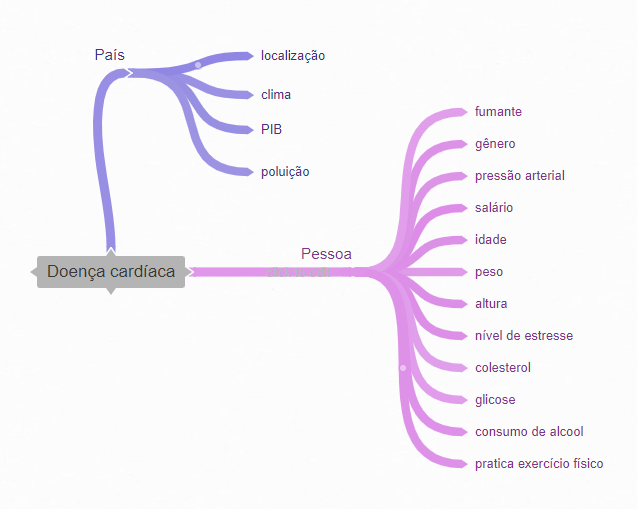

In [25]:
Image("images/coggle_mind_map.PNG")

Hypotheses:
* High cholesterol -> cardio disease
* High systolic blood pressure -> cardio disease
* High diastolic blood pressure -> cardio disease
* High glucose -> cardio disease
* Non active (0) -> cardio disease

## EDA (Exploratory data analysis) 
### Univariate analysis

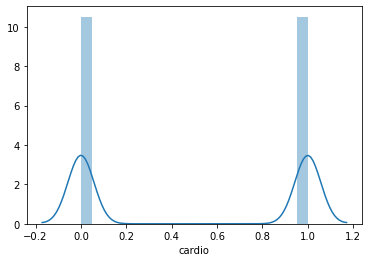

In [26]:
sns.distplot( data_raw['cardio'] );

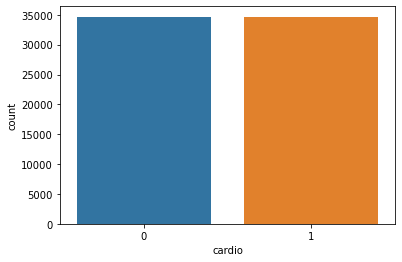

In [27]:
sns.countplot( data_raw['cardio'] );

High cholesterol -> cardio disease
High systolic blood pressure -> cardio disease
High diastolic blood pressure -> cardio disease
High glucose -> cardio disease
Non active (0) -> cardio disease

### Hypothesis tests

High cholesterol -> cardio disease

True

In [28]:
data_raw.columns

Index(['id', 'gender', 'height', 'weight', 'sys_press', 'dia_press',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age'],
      dtype='object')

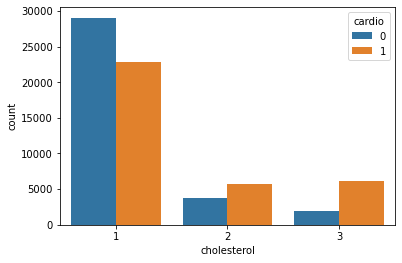

In [29]:
# countplot

sns.countplot( hue='cardio', x='cholesterol', data=data_raw );

High systolic blood pressure -> cardio disease

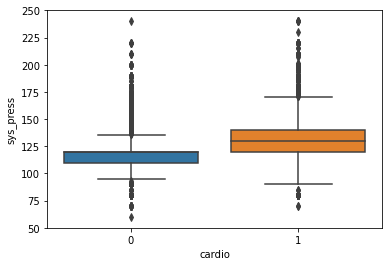

In [30]:
# boxplot

fig, ax = plt.subplots()
sns.boxplot( data=data_raw, x='cardio', y='sys_press', ax=ax);
ax.set_ylim(50, 250)
plt.show()

High diastolic blood pressure -> cardio disease

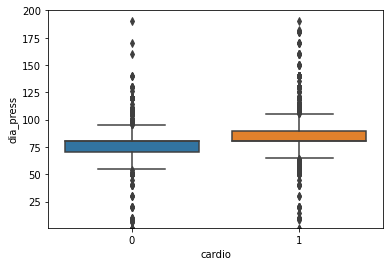

In [31]:
# boxplot

fig, ax = plt.subplots()
sns.boxplot( data=data_raw, x='cardio', y='dia_press', ax=ax);
ax.set_ylim(1, 200)
plt.show()

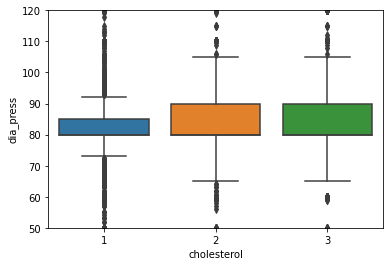

In [32]:
# cholesterol and sys_press

fig, ax = plt.subplots()
sns.boxplot( data=data_raw, x='cholesterol', y='dia_press', ax=ax);
ax.set_ylim(50, 120)
plt.show()

High glucose -> cardio disease

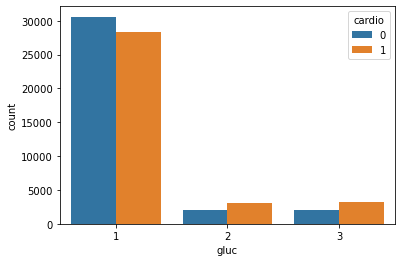

In [33]:
# countplot

sns.countplot( hue='cardio', x='gluc', data=data_raw );

Non active (0) -> cardio disease

In [34]:
pd.crosstab( data_raw['active'], data_raw['cardio'] ).apply( lambda x: x / x.sum(), axis=1 )

cardio,0,1
active,,
0,0.464370,0.535630
1,0.509198,0.490802


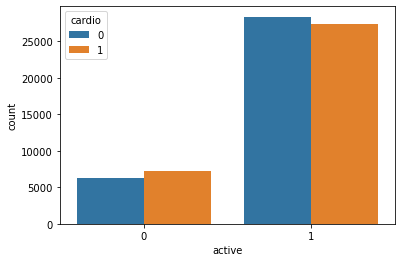

In [35]:
sns.countplot( hue='cardio', x='active', data=data_raw );

## Choosing the Classification Models 
### Support Vector Machine (SVM)
#### Description and Intuition
The main ideas behind Support Vector Machines are:
1. Start with data in a relatively low dimension
2. Move the data into a higher dimension
3. Find a Support Vector Classifier that separates the higher dimensional data into two groups

![SVM intuition](images/SVM.svg)

The **polynomial kernel** computes the relationship between each pair of observations and that information is used to build the Support Vector Classifier that separates the data the best. Since different transformations are possible (d=1, d=2 (squared), d=3 (cubic), etc), the polynomial kernel is computed using different values of **d** (the degree of the polynomial), and *cross-validation* is used to choose the best value of d.

![SVM kernel](images/SVM_kernel.svg)

#### Data preprocessing

Based on [this](https://www.youtube.com/watch?v=8A7L0GsBiLQ) YouTube video, we will do the following steps for SVM data preprocessing:

1)	- remove/impute missing values
	- are not optimized for high volumes of data, so we might need to downsample it
		- in the example, from 29932 to 2000 (1000 of each category)

2) splits the columns into variables (X) and the data to be predicted (y)

3) SVM support continuous data but do NOT support categorical data
    - so we need to use one-hot encoding
    - get_dummies() pandas function may do that

4) centering and scaling the data
	- the radial basis function that we are using in SVM assumes that the data are centered and scaled. In other words, each column should have a mean=0 and a std=1. So we need to do it for both training and testing datasets.

### XGBoost

#### Description and Intuition
The main ideas behind XGBoost (Extreme Gradient Boosting) are:
1. It's based on multiple decision trees to make predictions (decision tree ensemble learning algorithm). 
2. First the tree picks a root (one of the features) than it generates branches until there is a limiting factor for the growth of the tree.
3. To reduce variance of the model, each tree improves the errors of the previous one.

#### Data preprocessing
Based on [this](https://www.youtube.com/watch?v=GrJP9FLV3FE) YouTube video, we will do the following steps for XGBoost data preprocessing:

- split data into dependent and independent variables
- one-hot encoding (we won't need it)
- convert all columns to int, float or bool (we won't need it)

### Optimization
- scale_pos_weight helps to deal with unbalanced data (adds a penalty for misclassified minority class, i.e. the tree will try harder to classify the minority class)
- hyperparameters fine tunning: max_depth, learning_rate (i.e. eta), gamma (parameter that encourages pruning), reg_lambda

#### Observations
- So far, we have seen that our data needs to be numerical, i.e., we would need to transform any categorical or text data if we had it. However, all our features are numerical, so we don't need to do such a transformation. 
- By default, the XGBoost implementation treats missing data as zero. This could be an issue, however, because our data does not have any missing data, we don't need to worry about it. 
- We haven't seen any requirements for scaling our data.

#### Optimization backlog
- Define our data as either sparse or dense and apply the most approppriate datatypes (as defined [here](https://scikit-learn.org/stable/modules/svm.html))

### Baseline strategy
1. check the percentage of people who has cardio disease
2. use that number to choose the probability of assigning someone as having cardio disease

# Data Preparation

## One hot encoding for categorical variables

In [36]:
df = data_raw.copy()

In [37]:
df.columns

Index(['id', 'gender', 'height', 'weight', 'sys_press', 'dia_press',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age'],
      dtype='object')

### Gender

In [38]:
df['gender'].unique()

array([1, 2])

In [39]:
df = pd.get_dummies( df, columns=['gender'] )

In [40]:
df.head()

,id,height,weight,sys_press,dia_press,cholesterol,gluc,smoke,alco,active,cardio,age,gender_1,gender_2
0,988,155,69.0,130,80,2,2,0,0,1,0,61.6,1,0
1,989,163,71.0,110,70,1,1,0,0,1,1,40.1,1,0
2,990,165,70.0,120,80,1,1,0,0,1,0,60.0,1,0
3,991,165,85.0,120,80,1,1,1,1,1,0,39.9,0,1
4,992,155,62.0,120,80,1,1,0,0,1,0,64.1,1,0


### Cholesterol

In [41]:
df.columns

Index(['id', 'height', 'weight', 'sys_press', 'dia_press', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'age', 'gender_1',
       'gender_2'],
      dtype='object')

In [42]:
df['cholesterol'].unique()

array([2, 1, 3])

In [43]:
df = pd.get_dummies( df, columns=['cholesterol'] )

In [44]:
df.head()

,id,height,weight,sys_press,dia_press,gluc,smoke,alco,active,cardio,age,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3
0,988,155,69.0,130,80,2,0,0,1,0,61.6,1,0,0,1,0
1,989,163,71.0,110,70,1,0,0,1,1,40.1,1,0,1,0,0
2,990,165,70.0,120,80,1,0,0,1,0,60.0,1,0,1,0,0
3,991,165,85.0,120,80,1,1,1,1,0,39.9,0,1,1,0,0
4,992,155,62.0,120,80,1,0,0,1,0,64.1,1,0,1,0,0


### Glucose

In [45]:
df = pd.get_dummies( df, columns=['gluc'] )

In [46]:
df.head()

,id,height,weight,sys_press,dia_press,smoke,alco,active,cardio,age,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,988,155,69.0,130,80,0,0,1,0,61.6,1,0,0,1,0,0,1,0
1,989,163,71.0,110,70,0,0,1,1,40.1,1,0,1,0,0,1,0,0
2,990,165,70.0,120,80,0,0,1,0,60.0,1,0,1,0,0,1,0,0
3,991,165,85.0,120,80,1,1,1,0,39.9,0,1,1,0,0,1,0,0
4,992,155,62.0,120,80,0,0,1,0,64.1,1,0,1,0,0,1,0,0


## Transformation

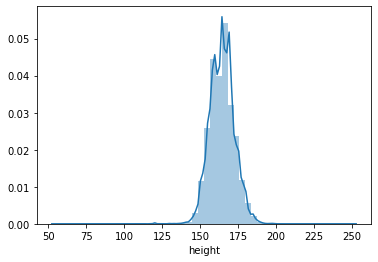

In [47]:
sns.distplot( df['height'] );
# Candidate for normalization

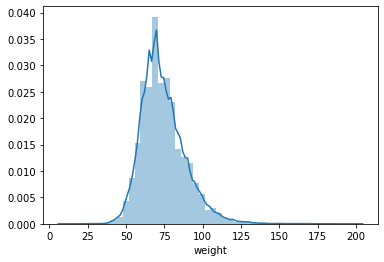

In [48]:
sns.distplot( df['weight'] );
# Candidate for normalization

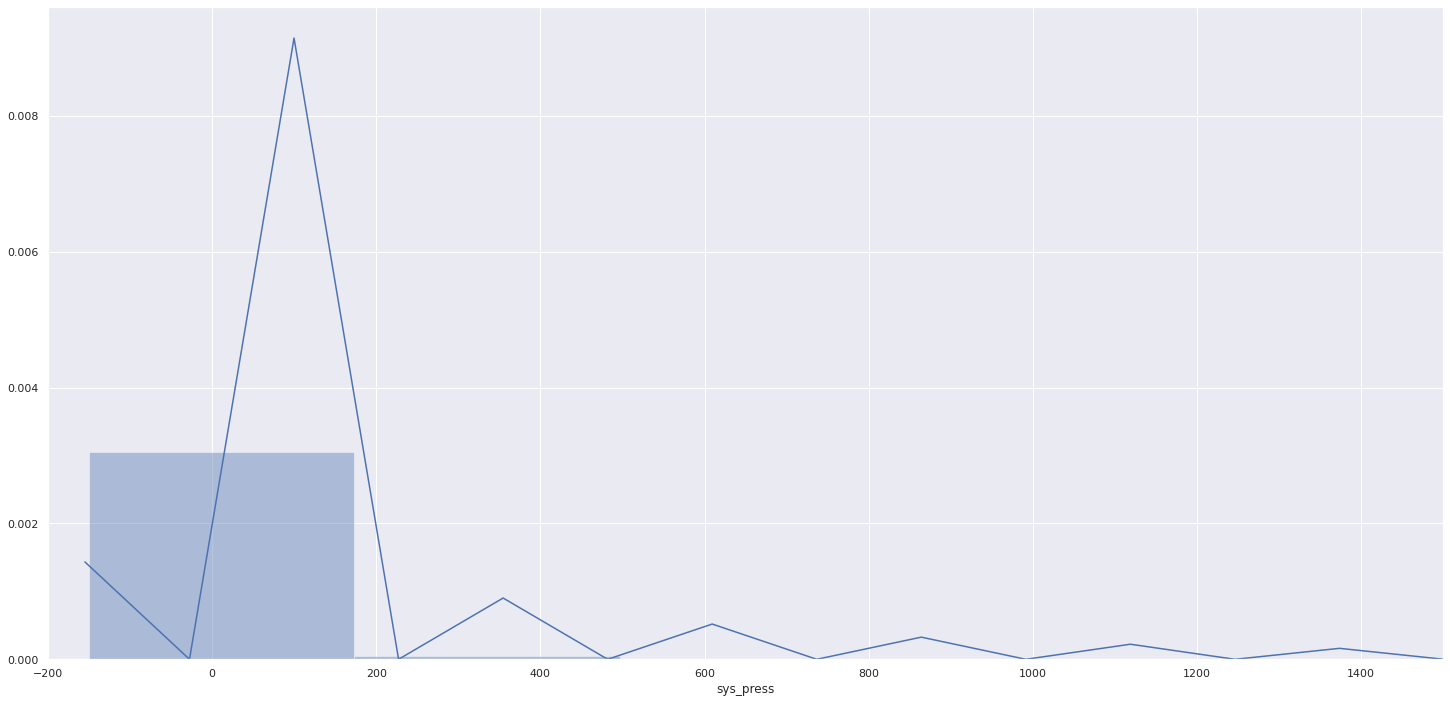

In [55]:
fig, ax = plt.subplots()
sns.distplot( df['sys_press'], ax=ax );
ax.set_xlim( -200,1500 )
plt.show()

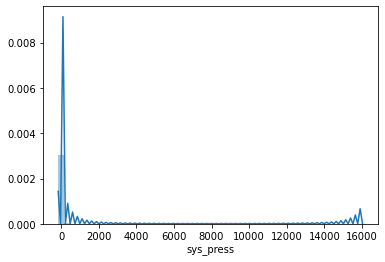

In [50]:
sns.distplot( df['sys_press'] );

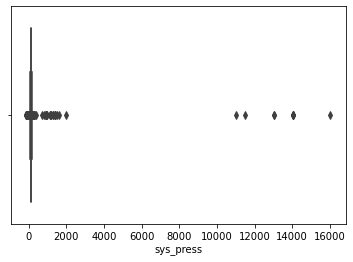

In [51]:
sns.boxplot( df['sys_press'] );

Let's assume that systolic pressures higher than 4000 are outliers and remove those from our dataset. According to the previous boxplot, that should remove only a few data points.

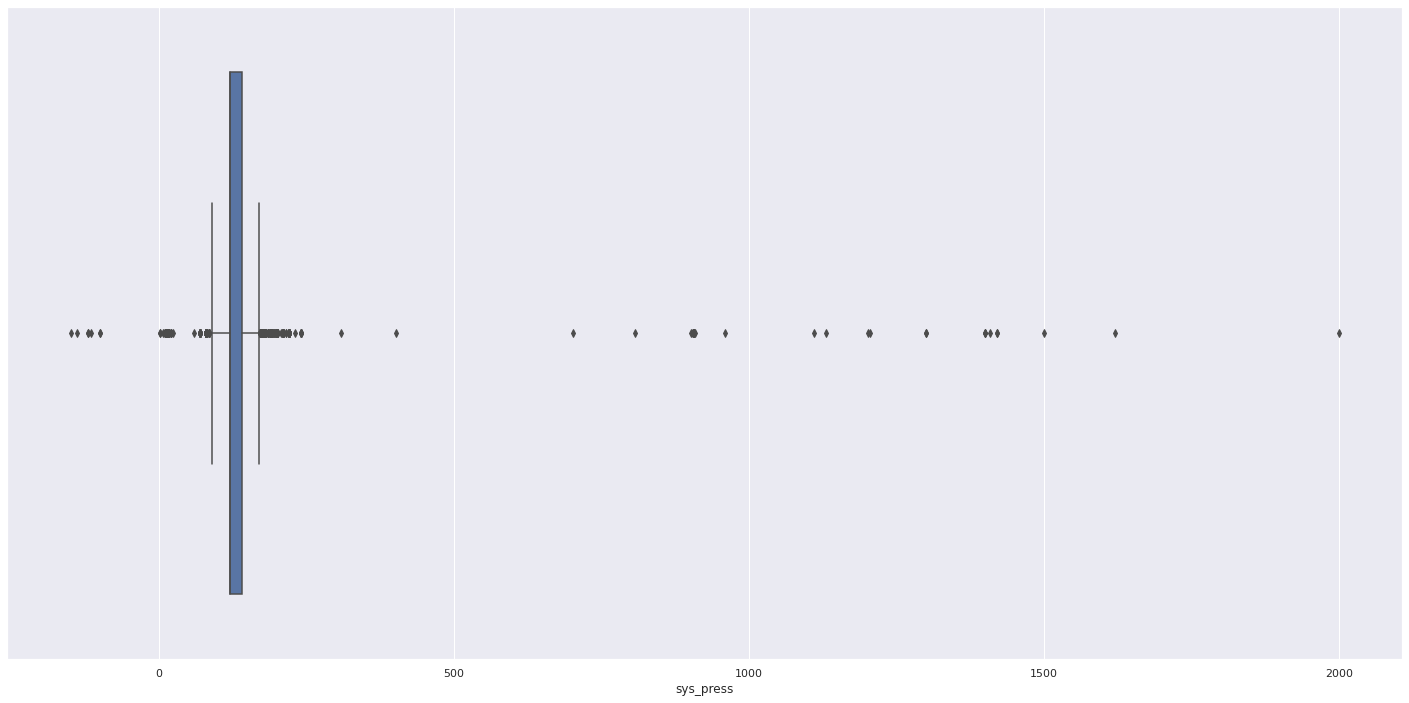

In [59]:
df = df[df['sys_press'] <= 4000]

sns.boxplot( df['sys_press'] );

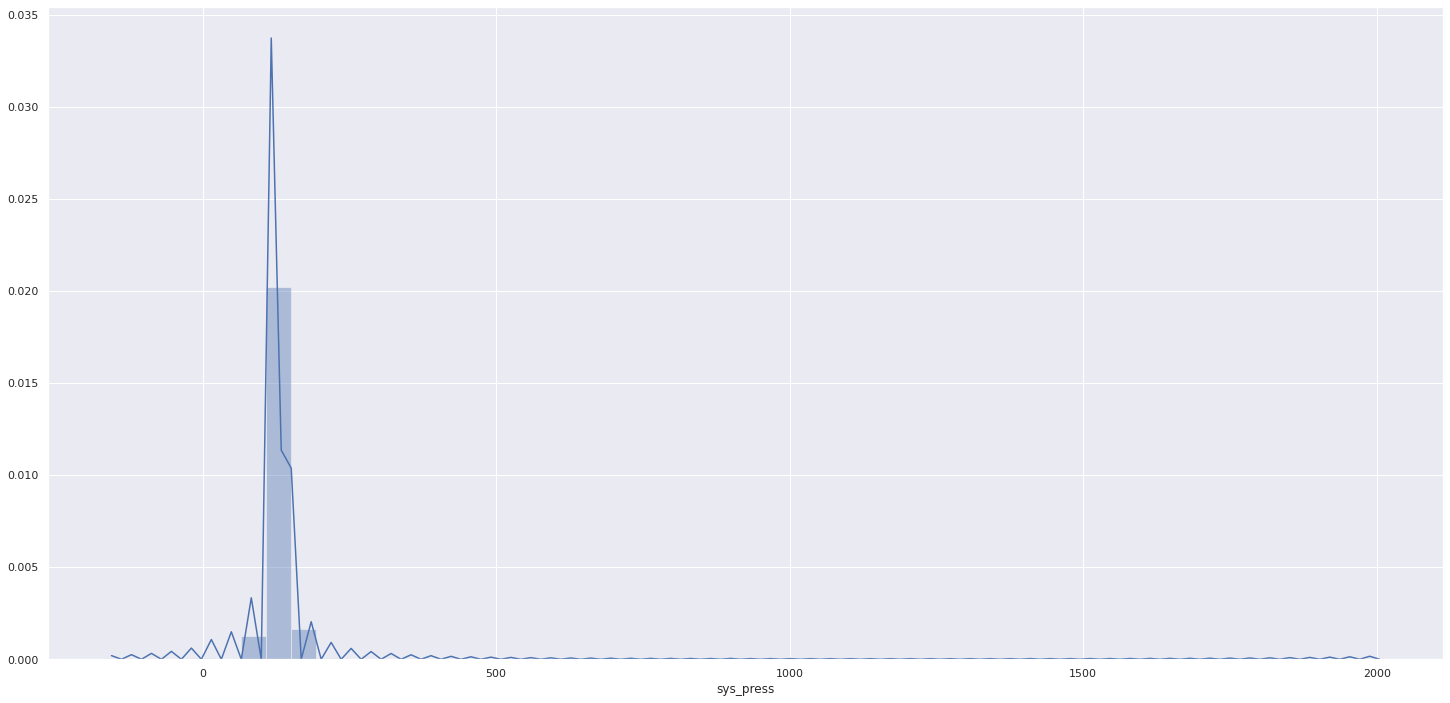

In [60]:
sns.distplot( df['sys_press'] );
# Candidate for robust scaler

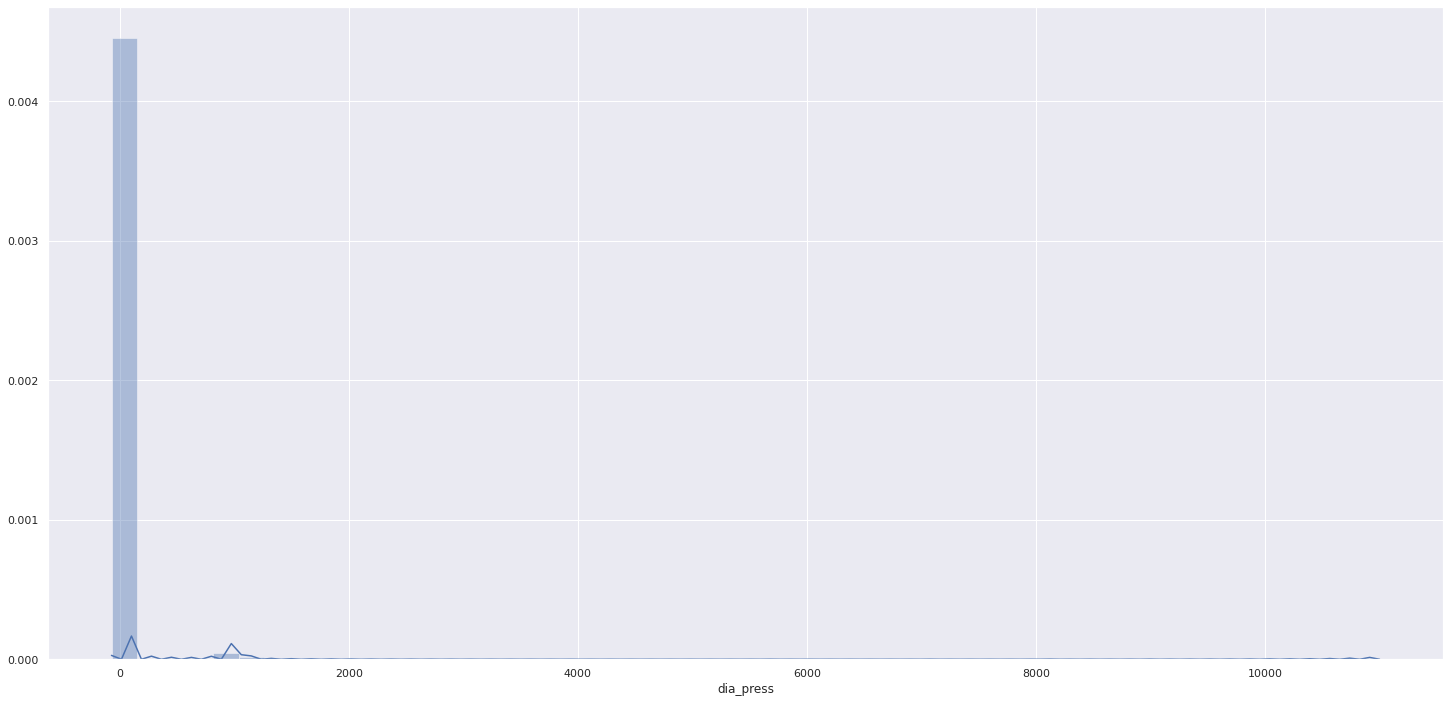

In [61]:
sns.distplot( df['dia_press'] );

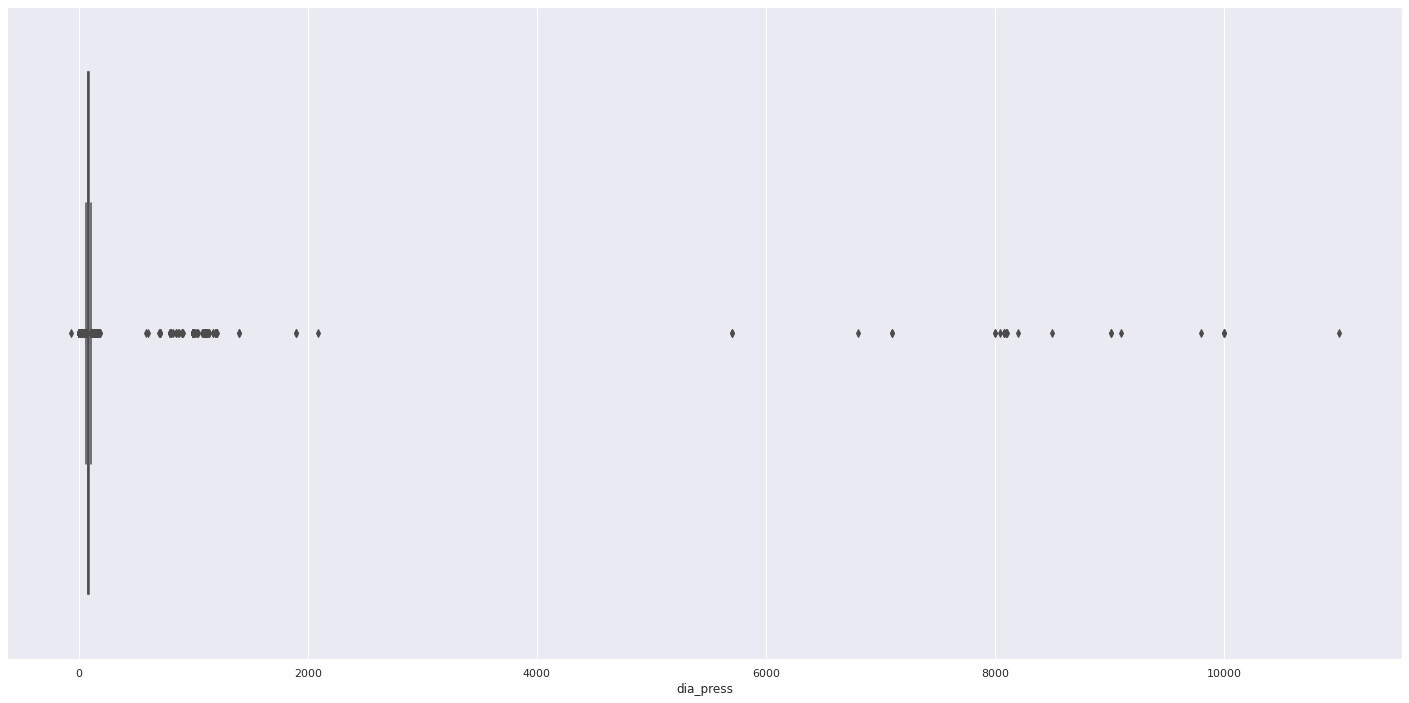

In [62]:
sns.boxplot( df['dia_press'] );

In [65]:
df = df[df['dia_press'] <= 5000]

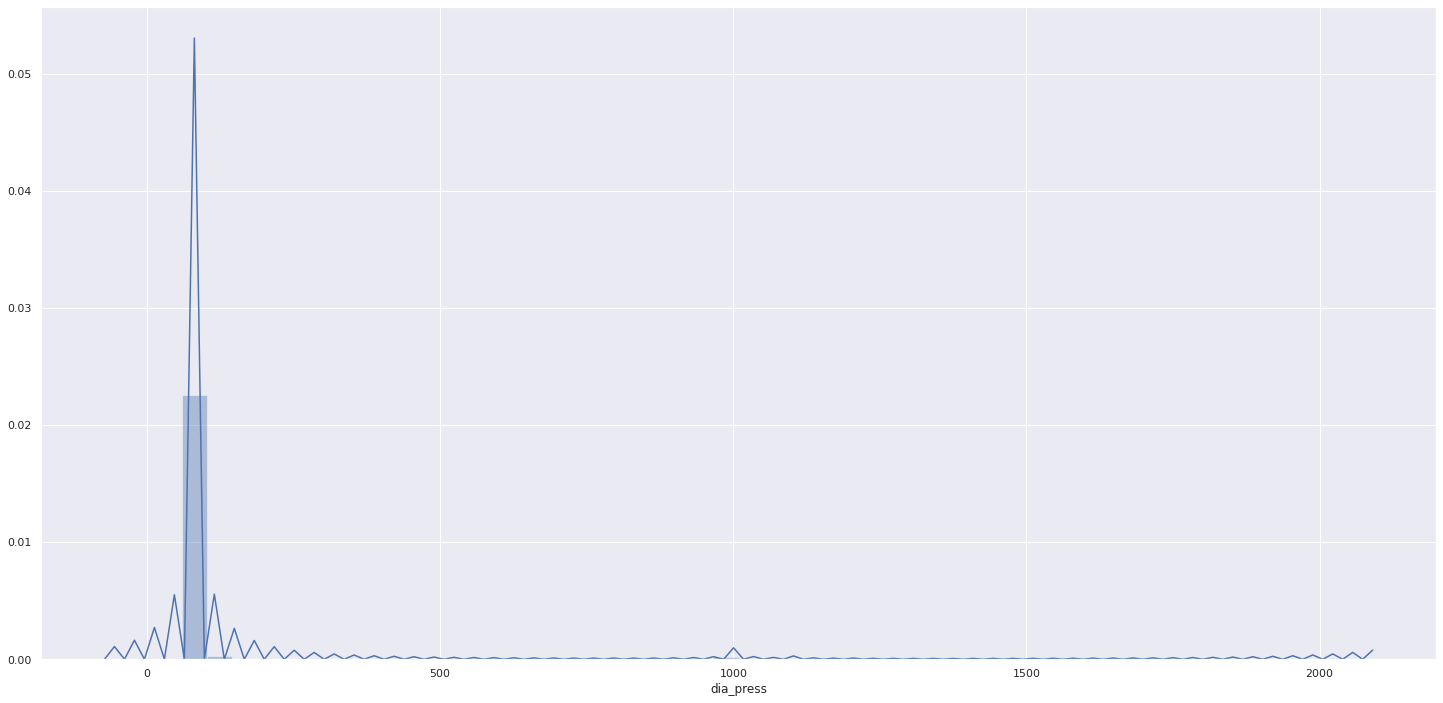

In [66]:
sns.distplot( df['dia_press'] )

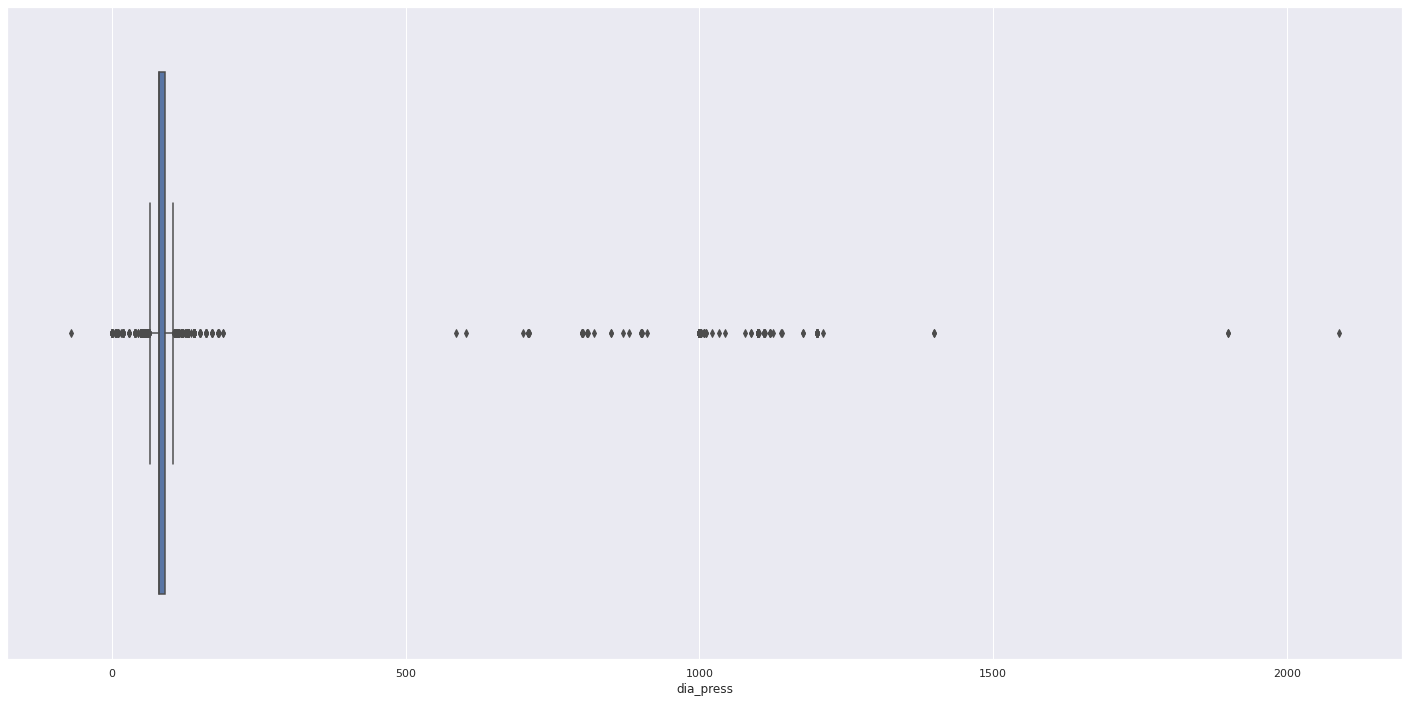

In [67]:
sns.boxplot( df['dia_press'] )

Checking what are the datapoints that have really high systolic and diastolic pressures

In [69]:
df.loc[df['dia_press'] > 500, ['id', 'sys_press', 'dia_press']]

,sys_press,dia_press
20,140,1000
182,150,1100
301,160,1000
334,150,1001
375,140,1000
393,140,1000
582,130,1000
794,170,1000
823,140,1000
876,170,1200


In [71]:
df.loc[df['sys_press'] > 500, ['id', 'sys_press', 'dia_press']]

,id,sys_press,dia_press
1177,2654,902,60
1315,2845,906,0
4118,6822,909,60
8216,12710,1420,80
8858,13616,701,110
13196,19827,1500,80
17014,25314,907,70
23168,34120,906,0
25081,36793,1400,80
27448,40239,1620,80


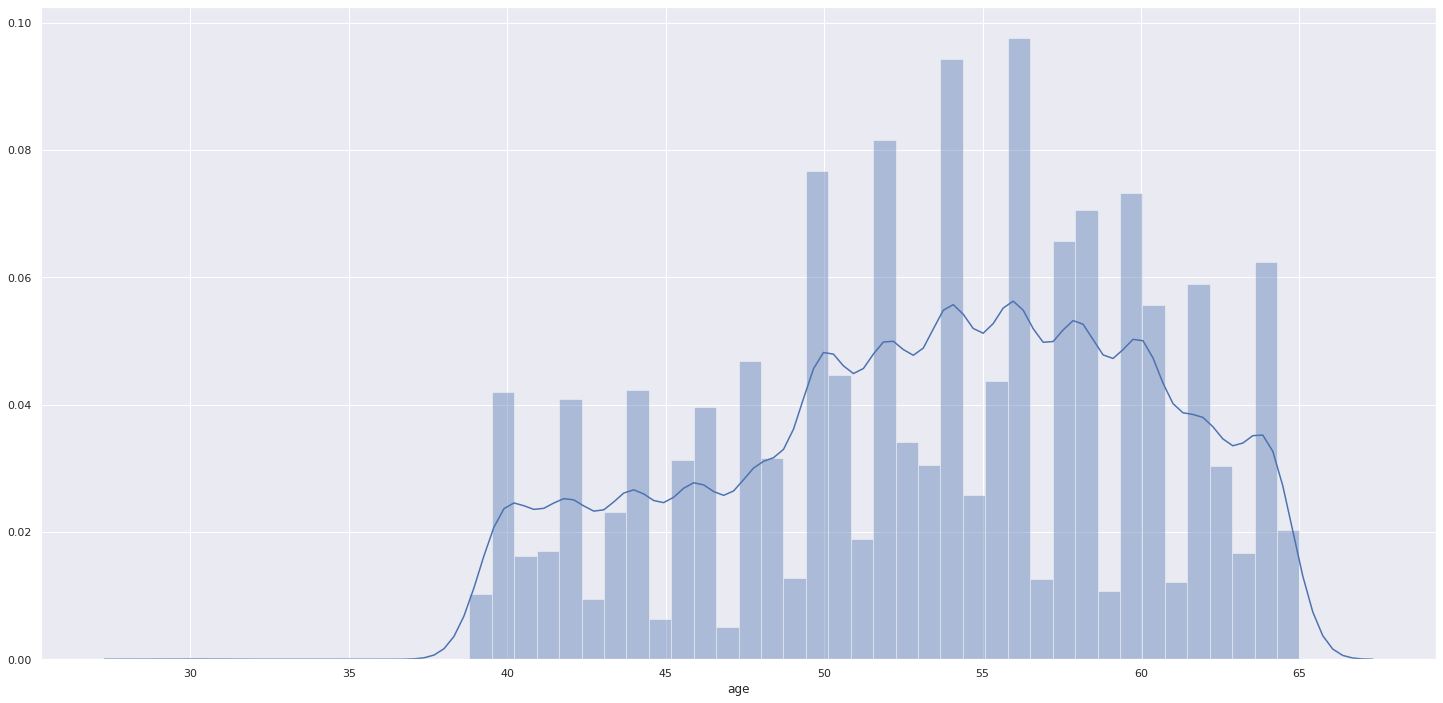

In [72]:
sns.distplot(df['age'])

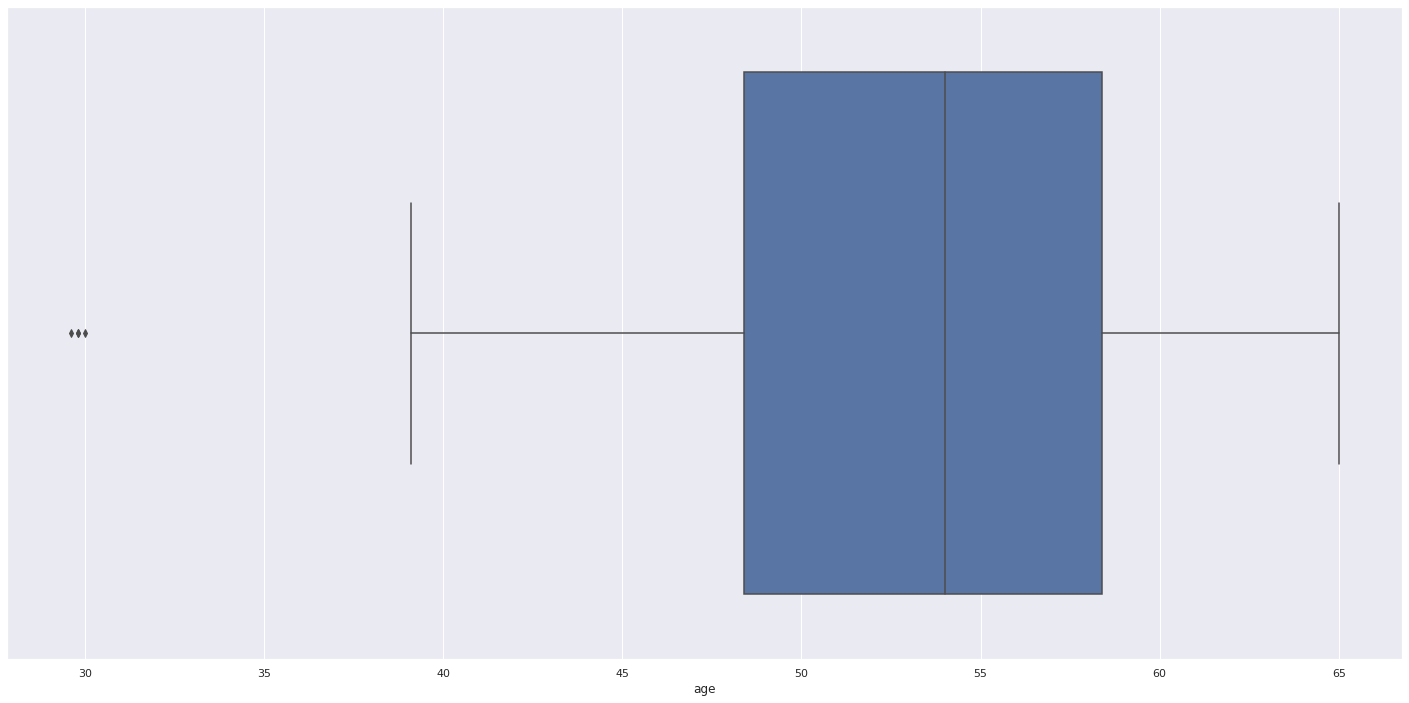

In [73]:
sns.boxplot( df['age'] )
# Candidate for min-max scaler

## Next steps

Data transformation:
- Scale our data to make it compatible with SVM models (check if is necessary)
      - Check downsampling strategy for SVM
Split data:      
- Split data into dependent and independent variables
- Split data into train and test
- 'Split' data for cross validation

Run models:
- Run SVM and XGBoost
- Check performance of both models (e.g. confusion matrix)

## Backlog
* Study `sns.distplot`
    * What's the meaning of the `y` axis? How can the `density` be interpreted?  
* Search for a real cardiodisease dataset  
    * We believe the current dataset is not real
* Evaluate renaming some binary variables
* Check information about systolic and diastolic pressure